<a href="https://colab.research.google.com/github/Hareem19/DataSciencePractice1/blob/main/lung_cancer_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

In [2]:
import os
import matplotlib.pyplot as plt

In [16]:
from tensorflow.keras.preprocessing.image import img_to_array


In [17]:
from keras import layers
from keras import models

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(200, 200, 3))) #reducing size
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [19]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [20]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/lungs/train",target_size=(200,200),batch_size=20,class_mode='binary')
#the term "target size"
#typically refers to the desired dimensions or size of the input data that the model expects during training or inference.

Found 374 images belonging to 2 classes.


In [25]:
history = model.fit_generator(train_generator,steps_per_epoch=10,epochs=30)

<ipython-input-25-7f02c26c009d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=10,epochs=30)


Epoch 1/30
10/10 [==============================] - 2s 208ms/step - loss: 0.6412 - acc: 0.6600
Epoch 2/30
10/10 [==============================] - 2s 212ms/step - loss: 0.5849 - acc: 0.7650
Epoch 3/30
10/10 [==============================] - 2s 193ms/step - loss: 0.5097 - acc: 0.8247
Epoch 4/30
10/10 [==============================] - 2s 204ms/step - loss: 0.4845 - acc: 0.7900
Epoch 5/30
10/10 [==============================] - 3s 275ms/step - loss: 0.4203 - acc: 0.8041
Epoch 6/30
10/10 [==============================] - 2s 218ms/step - loss: 0.3811 - acc: 0.8299
Epoch 7/30
10/10 [==============================] - 2s 190ms/step - loss: 0.3744 - acc: 0.8557
Epoch 8/30
10/10 [==============================] - 3s 284ms/step - loss: 0.3247 - acc: 0.8814
Epoch 9/30
10/10 [==============================] - 3s 263ms/step - loss: 0.2922 - acc: 0.8763
Epoch 10/30
10/10 [==============================] - 2s 182ms/step - loss: 0.2619 - acc: 0.9124
Epoch 11/30
10/10 [==============================

In [29]:
model.save('lung_cancer_detection')

In [34]:
test_gen=test_datagen.flow_from_directory('/content/drive/MyDrive/lungs/test',target_size=(200,200),batch_size=20,class_mode='binary')

Found 160 images belonging to 2 classes.


In [35]:
y_test=model.evaluate(test_gen)


8/8 [==============================] - 77s 4s/step - loss: 0.2982 - acc: 0.8938


In [37]:
y_pred=model.predict(test_gen)

8/8 [==============================] - 2s 172ms/step


In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
# # Generate a classification report
# report = classification_report(y_test, y_pred)

# # Print the classification report
# print("Classification Report:\n", report)


ValueError: ignored

In [42]:
# Assuming you have a test generator named test_gen
true_labels = test_gen.classes

# Generate predictions using the test generator
y_pred = model.predict_generator(test_gen)

# Generate a classification report
report = classification_report(true_labels, (y_pred > 0.5).astype(int))  # Assuming binary classification

# Print the classification report
print("Classification Report:\n", report)


<ipython-input-42-9e2debb937a3>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_gen)


Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.59      0.56        90
           1       0.39      0.34      0.37        70

    accuracy                           0.48       160
   macro avg       0.46      0.47      0.46       160
weighted avg       0.47      0.48      0.48       160



In [44]:
y_pred

array([[9.9405307e-01],
       [5.1053148e-02],
       [7.0033181e-03],
       [9.2607319e-01],
       [4.3731582e-01],
       [9.5293653e-01],
       [3.1549251e-01],
       [1.4837952e-03],
       [1.9310988e-03],
       [3.0931721e-03],
       [7.6761764e-01],
       [9.8437065e-01],
       [8.2975763e-01],
       [9.6836430e-01],
       [1.4924563e-03],
       [1.5052233e-02],
       [2.8315678e-04],
       [3.5382363e-01],
       [4.2345017e-04],
       [3.9306104e-02],
       [7.8521460e-01],
       [4.0103701e-01],
       [9.8093569e-01],
       [3.5606222e-03],
       [9.5560116e-01],
       [9.5598787e-01],
       [2.5949992e-02],
       [2.3737042e-01],
       [9.7406149e-01],
       [8.4178545e-02],
       [7.3457584e-02],
       [3.6647702e-03],
       [7.8202011e-03],
       [3.9346766e-01],
       [3.1265646e-01],
       [9.2609447e-01],
       [2.2027861e-02],
       [2.7958781e-01],
       [2.8979818e-03],
       [8.5703564e-01],
       [1.0211210e-01],
       [9.594822

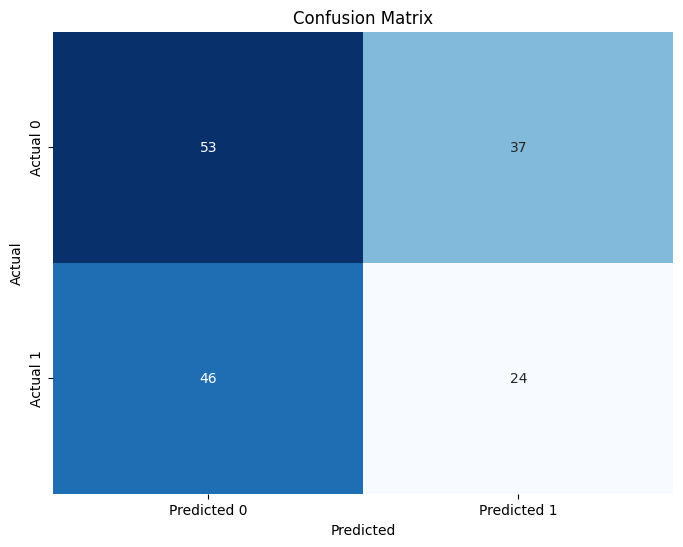

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have true labels and predicted probabilities
# true_labels = test_gen.classes  # If not defined earlier, use the appropriate source for true labels

# Threshold the predicted probabilities to get class labels (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Generate a confusion matrix
cm = confusion_matrix(true_labels, y_pred_binary)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [26]:
# train_datagen = ImageDataGenerator( rescale=1./255,
#                                     rotation_range=40,
#                                     width_shift_range=0.2,
#                                     height_shift_range=0.2,
#                                     shear_range=0.2,
#                                     zoom_range=0.2,
#                                     horizontal_flip=True,)
# test_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(train_dir,
#                                                     target_size=(200, 200),
#                                                     batch_size=32,
#                                                     class_mode='binary')
# history = model.fit_generator(train_generator,
#                             steps_per_epoch=100,
#                             epochs=100)